In [2]:
import os
import pandas as pd
import re
from tqdm import tqdm
from utils import load_jsonl_iteratively

ROOT = "/data/xzhao/experiments/med-eval/dataset/losses/results/random_2k/ja_full_original/llm-jp-3-13b-exp2-multi"
ROOT = "/data/xzhao/experiments/med-eval/dataset/losses/results/random_2k/ja_full_original/llm-jp-3-13b-exp1-multi-ja"

iter_losses = []
examples = {}
for fn in tqdm(os.listdir(ROOT)):
    if not fn.startswith("iter_"):
        continue

    num_iter = int(re.match("iter_(\d+)", fn).group(1))
    fn = os.path.join(ROOT, fn)
    for item in load_jsonl_iteratively(fn):
        
        iter_losses.append({
            'doc_id': item['id'],
            'num_iter': num_iter,
            'loss': item['avg_loss'],
        })
df = pd.DataFrame(iter_losses)

100%|██████████| 20/20 [00:06<00:00,  3.15it/s]


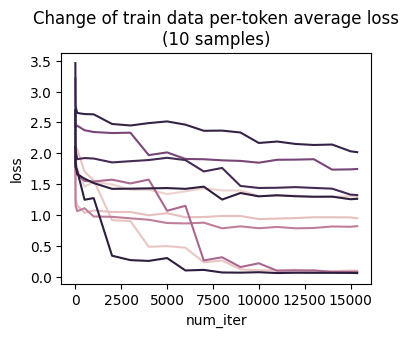

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sample_ids = df["doc_id"].drop_duplicates().sample(10, random_state=42).tolist()
df_subset = df[df["doc_id"].isin(sample_ids)]

plt.figure(figsize=(4, 3))
sns.lineplot(
    data=df_subset,
    x="num_iter",
    y="loss",
    hue="doc_id",
    legend=False
)
plt.title("Change of train data per-token average loss\n(10 samples)")
plt.show()


In [4]:
sample_ids

[-7416065896188498464,
 8267555281637670052,
 781517931075826762,
 7256510828427614904,
 8859233945122540130,
 -1216722254150514780,
 8784347191190072270,
 -6535950576102402177,
 4112584519289359899,
 -6118844674074177607]